##                                      Ford Go Bike 2019

## Exploratory Data Analysis 

In this first part, i will conduct an exploratory data analysis on Ford Go Bike 2019 Dataset. 

I Will Use Python data science and data visualization libraries to explore the dataset’s variables 

and understand the data’s structure, oddities, patterns, and relationships.



# Introduction 


Through this project we will use Exploratory Data Analysis to answer a lot of questions about  the data’s structure, oddities, patterns, and relationships

we will answer 3 questions :
    
    is Age has an effect on trips ('duration','distance') ?
    
    is Gender has an effect on trips ('duration','distance') ?
    
    is there any correlation between duration and distance?
    
    What is the effect of type user on trips ? 
    


In [201]:
## import lib
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import math
import time
from scipy import stats
%matplotlib inline
from matplotlib.pyplot import figure



## Data Wrangling 

In [202]:
## read the csv file 
data = pd.read_csv('201902-fordgobike-tripdata.csv') 


 ## The structure of the dataset


# Create Distance column 


In [205]:
# The Function for Distance measurment with Lat and long coordinates 
Distance = []
def Haversine(lat1,lon1,lat2,lon2, **kwarg):
    
    R = 6371.0088
    lat1,lon1,lat2,lon2 = map(np.radians, [lat1,lon1,lat2,lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2) **2
    c = 2 * np.arctan2(a**0.5, (1-a)**0.5)
    d = R * c
    
    return round(d,4) 

In [206]:
start_station_latitude= data['start_station_latitude']

start_station_longitude = data['start_station_longitude']*(-1)

end_station_latitude = data['end_station_latitude']

end_station_longitude = data['end_station_longitude']*(-1)

Distance = Haversine(start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude)


In [207]:
data['Distance_Km'] = Distance 

In [208]:
# Test Distance_Km
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Distance_Km
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,0.5447
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,1.7430
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2.7045
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,0.2607
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2.4093


In [209]:
## drop the 4 columns start_station_latitude	start_station_longitude end_station_latitude	end_station_longitude
data  = data.drop(['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude'],axis = 1)


## Creating Age column 

In [210]:
# Age member 
data['age'] = 2019 - data['member_birth_year'] 


In [211]:
data = data.drop(['member_birth_year'], axis = 1)

In [212]:
# Test Age Column 
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,Distance_Km,age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,Male,No,0.5447,35.0
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,NaN,No,1.7430,NaN
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,Male,No,2.7045,47.0
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,Other,No,0.2607,30.0
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,Male,Yes,2.4093,45.0


## Creating duration_min column

In [213]:
data['duration_min'] = round(data['duration_sec'] / 60,2)
data['duration_hour'] = round(data['duration_min'] / 60,2)

In [214]:
data = data.drop(['duration_sec'] , axis = 1)

In [215]:
# Test 
data.head()

,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,Distance_Km,age,duration_min,duration_hour
0,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,Male,No,0.5447,35.0,869.75,14.50
1,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,NaN,No,1.7430,NaN,708.68,11.81
2,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,Male,No,2.7045,47.0,1030.90,17.18
3,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,Other,No,0.2607,30.0,608.17,10.14
4,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,Male,Yes,2.4093,45.0,26.42,0.44


## Gather informations from start_time and end_time Columns 

In [216]:
# i will Create a function to convert end ans start time to more columns as Month , periode day for more informatiom 

def Date(col):
# 1. Convert time variables from string to datetime
# a. month of the year
    data[col] = pd.to_datetime(data[col])
    data[col + '_month_num'] = data[col].apply(lambda time: time.month)
    data[col + '_month_char'] = data[col + '_month_num'].apply(lambda x: calendar.month_abbr[x])
# b. morning, afternoon, night of a day
    data[col + '_hour'] = data[col].apply(lambda time: time.hour)
    data[col + '_period_day'] = 'morning'
    data[col + '_period_day'][(data[col + '_hour'] >= 12) & (data[col + '_hour'] <= 17)] = 'afternoon'
    data[col + '_period_day'][(data[col + '_hour'] >= 18) & (data[col + '_hour'] <= 23)] = 'night'
    
    return data

In [217]:
Date('start_time')
Date('end_time')

C:\Users\Mehdi\AppData\Local\Temp\ipykernel_16868\155479947.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_period_day'][(data[col + '_hour'] >= 12) & (data[col + '_hour'] <= 17)] = 'afternoon'
C:\Users\Mehdi\AppData\Local\Temp\ipykernel_16868\155479947.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_period_day'][(data[col + '_hour'] >= 18) & (data[col + '_hour'] <= 23)] = 'night'
C:\Users\Mehdi\AppData\Local\Temp\ipykernel_16868\155479947.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://p

,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,...,duration_min,duration_hour,start_time_month_num,start_time_month_char,start_time_hour,start_time_period_day,end_time_month_num,end_time_month_char,end_time_hour,end_time_period_day
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,Male,No,...,869.75,14.50,2,Feb,17,afternoon,3,Mar,8,morning
1,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,NaN,No,...,708.68,11.81,2,Feb,18,night,3,Mar,6,morning
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,Male,No,...,1030.90,17.18,2,Feb,12,afternoon,3,Mar,5,morning
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,Other,No,...,608.17,10.14,2,Feb,17,afternoon,3,Mar,4,morning
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,Male,Yes,...,26.42,0.44,2,Feb,23,night,3,Mar,0,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,324.0,Union Square (Powell St at Post St),4832,Subscriber,Male,No,...,8.00,0.13,2,Feb,0,morning,2,Feb,0,morning
183408,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21.0,Montgomery St BART Station (Market St at 2nd St),66.0,3rd St at Townsend St,4960,Subscriber,Male,No,...,5.22,0.09,2,Feb,0,morning,2,Feb,0,morning
183409,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278.0,The Alameda at Bush St,277.0,Morrison Ave at Julian St,3824,Subscriber,Male,Yes,...,2.35,0.04,2,Feb,0,morning,2,Feb,0,morning
183410,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,216.0,San Pablo Ave at 27th St,5095,Subscriber,Male,No,...,2.32,0.04,2,Feb,0,morning,2,Feb,0,morning


In [218]:
# c. Day of the week
columns = ['start_time', 'end_time']
for col in columns :
    
    data[col + '_weekday_num'] = data[col].apply(lambda time: time.dayofweek)
    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
    data[col + '_weekday_char'] = data[col + '_weekday_num'].map(dmap)

In [219]:
# Test data 
data.head()

,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,...,start_time_hour,start_time_period_day,end_time_month_num,end_time_month_char,end_time_hour,end_time_period_day,start_time_weekday_num,start_time_weekday_char,end_time_weekday_num,end_time_weekday_char
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,Male,No,...,17,afternoon,3,Mar,8,morning,3,Thu,4,Fri
1,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,NaN,No,...,18,night,3,Mar,6,morning,3,Thu,4,Fri
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,Male,No,...,12,afternoon,3,Mar,5,morning,3,Thu,4,Fri
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,Other,No,...,17,afternoon,3,Mar,4,morning,3,Thu,4,Fri
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,Male,Yes,...,23,night,3,Mar,0,morning,3,Thu,4,Fri


## Drop useless Columns 


In [220]:
data = data.drop(['start_time_month_num', 'end_time_month_num','start_time_month_num','end_time_month_num','start_time','end_time','start_station_id','end_station_id','bike_id','start_time_weekday_num','end_time_weekday_num'],axis = 1)

In [221]:
#test data 
data.head()

,start_station_name,end_station_name,user_type,member_gender,bike_share_for_all_trip,Distance_Km,age,duration_min,duration_hour,start_time_month_char,start_time_hour,start_time_period_day,end_time_month_char,end_time_hour,end_time_period_day,start_time_weekday_char,end_time_weekday_char
0,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,Male,No,0.5447,35.0,869.75,14.50,Feb,17,afternoon,Mar,8,morning,Thu,Fri
1,The Embarcadero at Steuart St,Berry St at 4th St,Customer,NaN,No,1.7430,NaN,708.68,11.81,Feb,18,night,Mar,6,morning,Thu,Fri
2,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,Male,No,2.7045,47.0,1030.90,17.18,Feb,12,afternoon,Mar,5,morning,Thu,Fri
3,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,Other,No,0.2607,30.0,608.17,10.14,Feb,17,afternoon,Mar,4,morning,Thu,Fri
4,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,Male,Yes,2.4093,45.0,26.42,0.44,Feb,23,night,Mar,0,morning,Thu,Fri


## remove null values 


In [222]:
## see how much nulls values
data.isnull().sum()


start_station_name          197
end_station_name            197
user_type                     0
member_gender              8265
bike_share_for_all_trip       0
Distance_Km                   0
age                        8265
duration_min                  0
duration_hour                 0
start_time_month_char         0
start_time_hour               0
start_time_period_day         0
end_time_month_char           0
end_time_hour                 0
end_time_period_day           0
start_time_weekday_char       0
end_time_weekday_char         0
dtype: int64

In [223]:
## drop all null values
data = data.dropna()

In [224]:
## test data 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   start_station_name       174952 non-null  object 
 1   end_station_name         174952 non-null  object 
 2   user_type                174952 non-null  object 
 3   member_gender            174952 non-null  object 
 4   bike_share_for_all_trip  174952 non-null  object 
 5   Distance_Km              174952 non-null  float64
 6   age                      174952 non-null  float64
 7   duration_min             174952 non-null  float64
 8   duration_hour            174952 non-null  float64
 9   start_time_month_char    174952 non-null  object 
 10  start_time_hour          174952 non-null  int64  
 11  start_time_period_day    174952 non-null  object 
 12  end_time_month_char      174952 non-null  object 
 13  end_time_hour            174952 non-null  int64  
 14  end_

## Cleaning Data for Bivariate Exploration

In [234]:
# remove if duration_min = 0 or member_gender = Other or Distance_Km = 0

data = data.loc[(data['duration_min'] != 0) & (data['Distance_Km'] != 0)] 

In [235]:
data = data.loc[(data['member_gender'] != 'Other')] 

In [236]:
# test data
data.head(10)

,start_station_name,end_station_name,user_type,member_gender,bike_share_for_all_trip,Distance_Km,age,duration_min,duration_hour,start_time_month_char,start_time_hour,start_time_period_day,end_time_month_char,end_time_hour,end_time_period_day,start_time_weekday_char,end_time_weekday_char
0,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,Male,No,0.5447,35.0,869.75,14.50,Feb,17,afternoon,Mar,8,morning,Thu,Fri
2,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,Male,No,2.7045,47.0,1030.90,17.18,Feb,12,afternoon,Mar,5,morning,Thu,Fri
4,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,Male,Yes,2.4093,45.0,26.42,0.44,Feb,23,night,Mar,0,morning,Thu,Fri
5,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,Male,No,3.3322,60.0,29.88,0.50,Feb,23,night,Mar,0,morning,Thu,Fri
6,Palm St at Willow St,San Jose Diridon Station,Subscriber,Female,No,2.0286,36.0,19.12,0.32,Feb,23,night,Mar,0,morning,Thu,Fri
7,Washington St at Kearny St,Valencia St at 21st St,Subscriber,Male,No,4.5326,30.0,26.92,0.45,Feb,23,night,Mar,0,morning,Thu,Fri
9,Post St at Kearny St,Mission Playground,Subscriber,Male,No,3.6641,27.0,17.48,0.29,Feb,23,night,Mar,0,morning,Thu,Fri
10,Jones St at Post St,San Francisco Public Library (Grove St at Hyde...,Subscriber,Female,Yes,0.9798,23.0,7.63,0.13,Feb,23,night,Mar,0,morning,Thu,Fri
11,Civic Center/UN Plaza BART Station (Market St ...,Bryant St at 2nd St,Subscriber,Male,No,1.6134,26.0,8.43,0.14,Feb,23,night,Mar,0,morning,Thu,Fri
12,Valencia St at 21st St,Broadway at Kearny,Customer,Male,No,4.7802,29.0,19.60,0.33,Feb,23,night,Mar,0,morning,Thu,Fri


In [237]:
# here we gonna remove outliers from distance , duration and age
cols = ['duration_min', 'Distance_Km','age'] # one or more
for col in cols :
    
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    data = data[~((data[col] < (Q1 - 1.5 * IQR)) |(data[col] > (Q3 + 1.5 * IQR)))]

In [238]:
# test data 
data.head()

,start_station_name,end_station_name,user_type,member_gender,bike_share_for_all_trip,Distance_Km,age,duration_min,duration_hour,start_time_month_char,start_time_hour,start_time_period_day,end_time_month_char,end_time_hour,end_time_period_day,start_time_weekday_char,end_time_weekday_char
6,Palm St at Willow St,San Jose Diridon Station,Subscriber,Female,No,2.0286,36.0,19.12,0.32,Feb,23,night,Mar,0,morning,Thu,Fri
9,Post St at Kearny St,Mission Playground,Subscriber,Male,No,3.6641,27.0,17.48,0.29,Feb,23,night,Mar,0,morning,Thu,Fri
10,Jones St at Post St,San Francisco Public Library (Grove St at Hyde...,Subscriber,Female,Yes,0.9798,23.0,7.63,0.13,Feb,23,night,Mar,0,morning,Thu,Fri
11,Civic Center/UN Plaza BART Station (Market St ...,Bryant St at 2nd St,Subscriber,Male,No,1.6134,26.0,8.43,0.14,Feb,23,night,Mar,0,morning,Thu,Fri
14,Bancroft Way at College Ave,Channing Way at Shattuck Ave,Subscriber,Male,No,1.2150,31.0,6.58,0.11,Feb,23,night,Mar,0,morning,Thu,Fri


In [239]:
# Creating the speed and duration_hour columns for better analysing process 

data['duration_hour'] = round(data['duration_min'] / 60,2)
data['Speed'] = data['Distance_Km'] / data['duration_hour']

In [240]:
# test data['Speed']
data['Speed']


6          6.339375
9         12.634828
10         7.536923
11        11.524286
14        11.045455
            ...    
183407    11.267692
183408    15.585556
183409     9.477500
183410    18.682500
183411     8.880000
Name: Speed, Length: 150584, dtype: float64

Our data now it's so clean , no it's the time finding the relationships between columns

## III. Bivariate Exploration

In [241]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150584 entries, 6 to 183411
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   start_station_name       150584 non-null  object 
 1   end_station_name         150584 non-null  object 
 2   user_type                150584 non-null  object 
 3   member_gender            150584 non-null  object 
 4   bike_share_for_all_trip  150584 non-null  object 
 5   Distance_Km              150584 non-null  float64
 6   age                      150584 non-null  float64
 7   duration_min             150584 non-null  float64
 8   duration_hour            150584 non-null  float64
 9   start_time_month_char    150584 non-null  object 
 10  start_time_hour          150584 non-null  int64  
 11  start_time_period_day    150584 non-null  object 
 12  end_time_month_char      150584 non-null  object 
 13  end_time_hour            150584 non-null  int64  
 14  end_

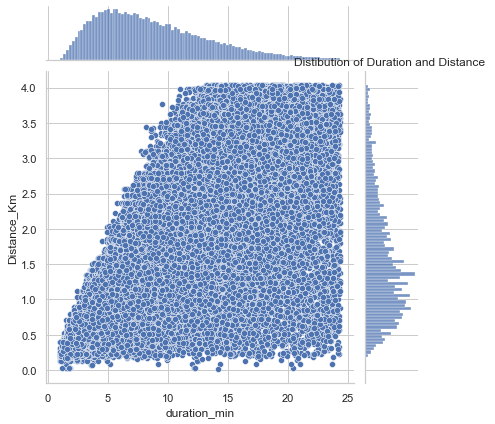

In [245]:
# Distribution between duration and Distance 
# we use
AD = data[['duration_min','Distance_Km']]

sns.jointplot(data=AD, x="duration_min", y="Distance_Km")
plt.title('Distibution of Duration and Distance ');


As we see there is a strong correlation beteen duration and distance 

## Multivariate Exploration

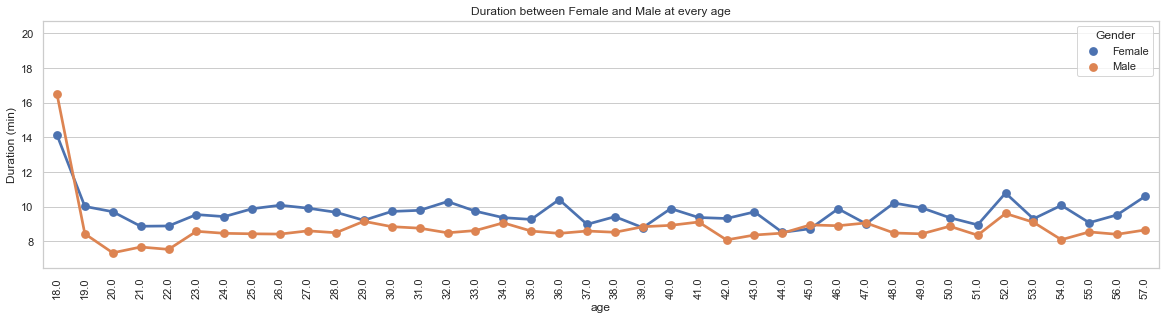

In [248]:
plt.figure(figsize=[20, 10])

# plot the point plot of the birth year vs. gender
plt.subplot(2, 1, 2)
sns.pointplot(data=data, x='age', y='duration_min', errwidth=0, hue='member_gender')
plt.xticks(rotation=90)
plt.xlabel('age')
plt.ylabel('Duration (min)')
plt.legend(title='Gender');
plt.title('Duration between Female and Male at every age');

The point plot shows the Female has a higher  duration than Male. 
is this due to that female needs more time for the same Distance or that female do more Distance then Male

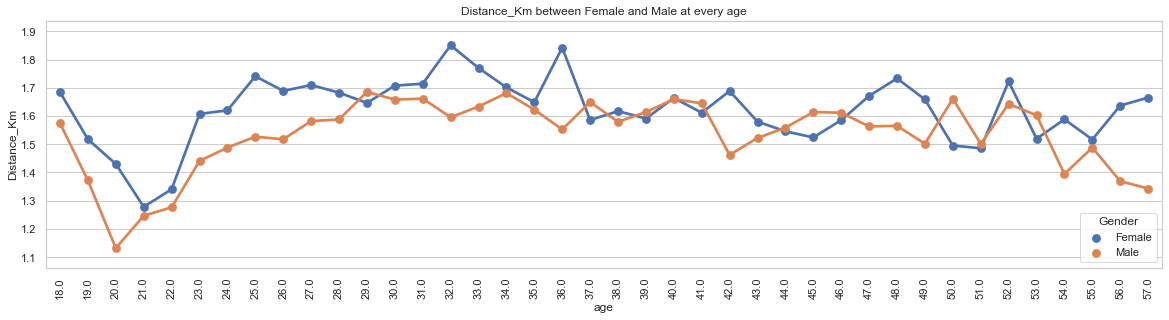

In [249]:
plt.figure(figsize=[20, 10])

# plot the point plot of the birth year vs. gender
plt.subplot(2, 1, 2)
sns.pointplot(data=data, x='age', y='Distance_Km', errwidth=0, hue='member_gender')
plt.xticks(rotation=90)
plt.xlabel('age')
plt.ylabel('Distance_Km')
plt.legend(title='Gender');
plt.title('Distance_Km between Female and Male at every age');

The point plot shows the Female has a higher Distance than Male. 
that why they need more duration 


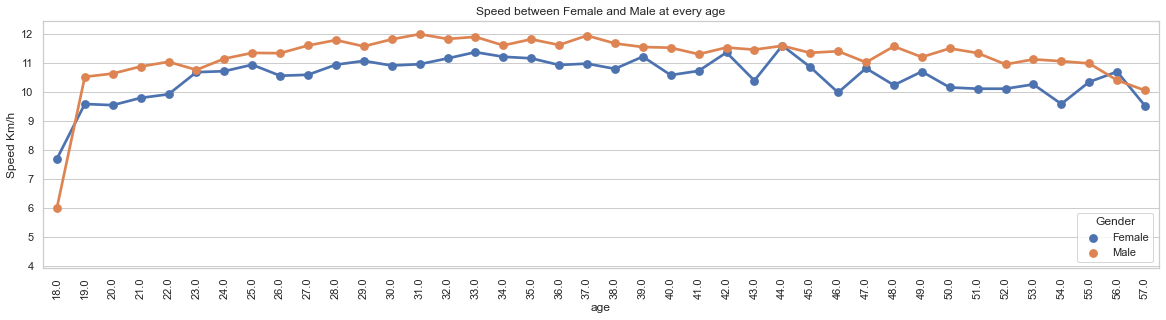

In [250]:
plt.figure(figsize=[20, 10])

plt.subplot(2, 1, 2)
sns.pointplot(data=data, x='age', y='Speed', errwidth=0, hue='member_gender')
plt.xticks(rotation=90)
plt.xlabel('age')
plt.ylabel('Speed Km/h')
plt.legend(title='Gender');
plt.title('Speed between Female and Male at every age');

As we see here Male use more speed than Female 

<Figure size 3600x1800 with 0 Axes>

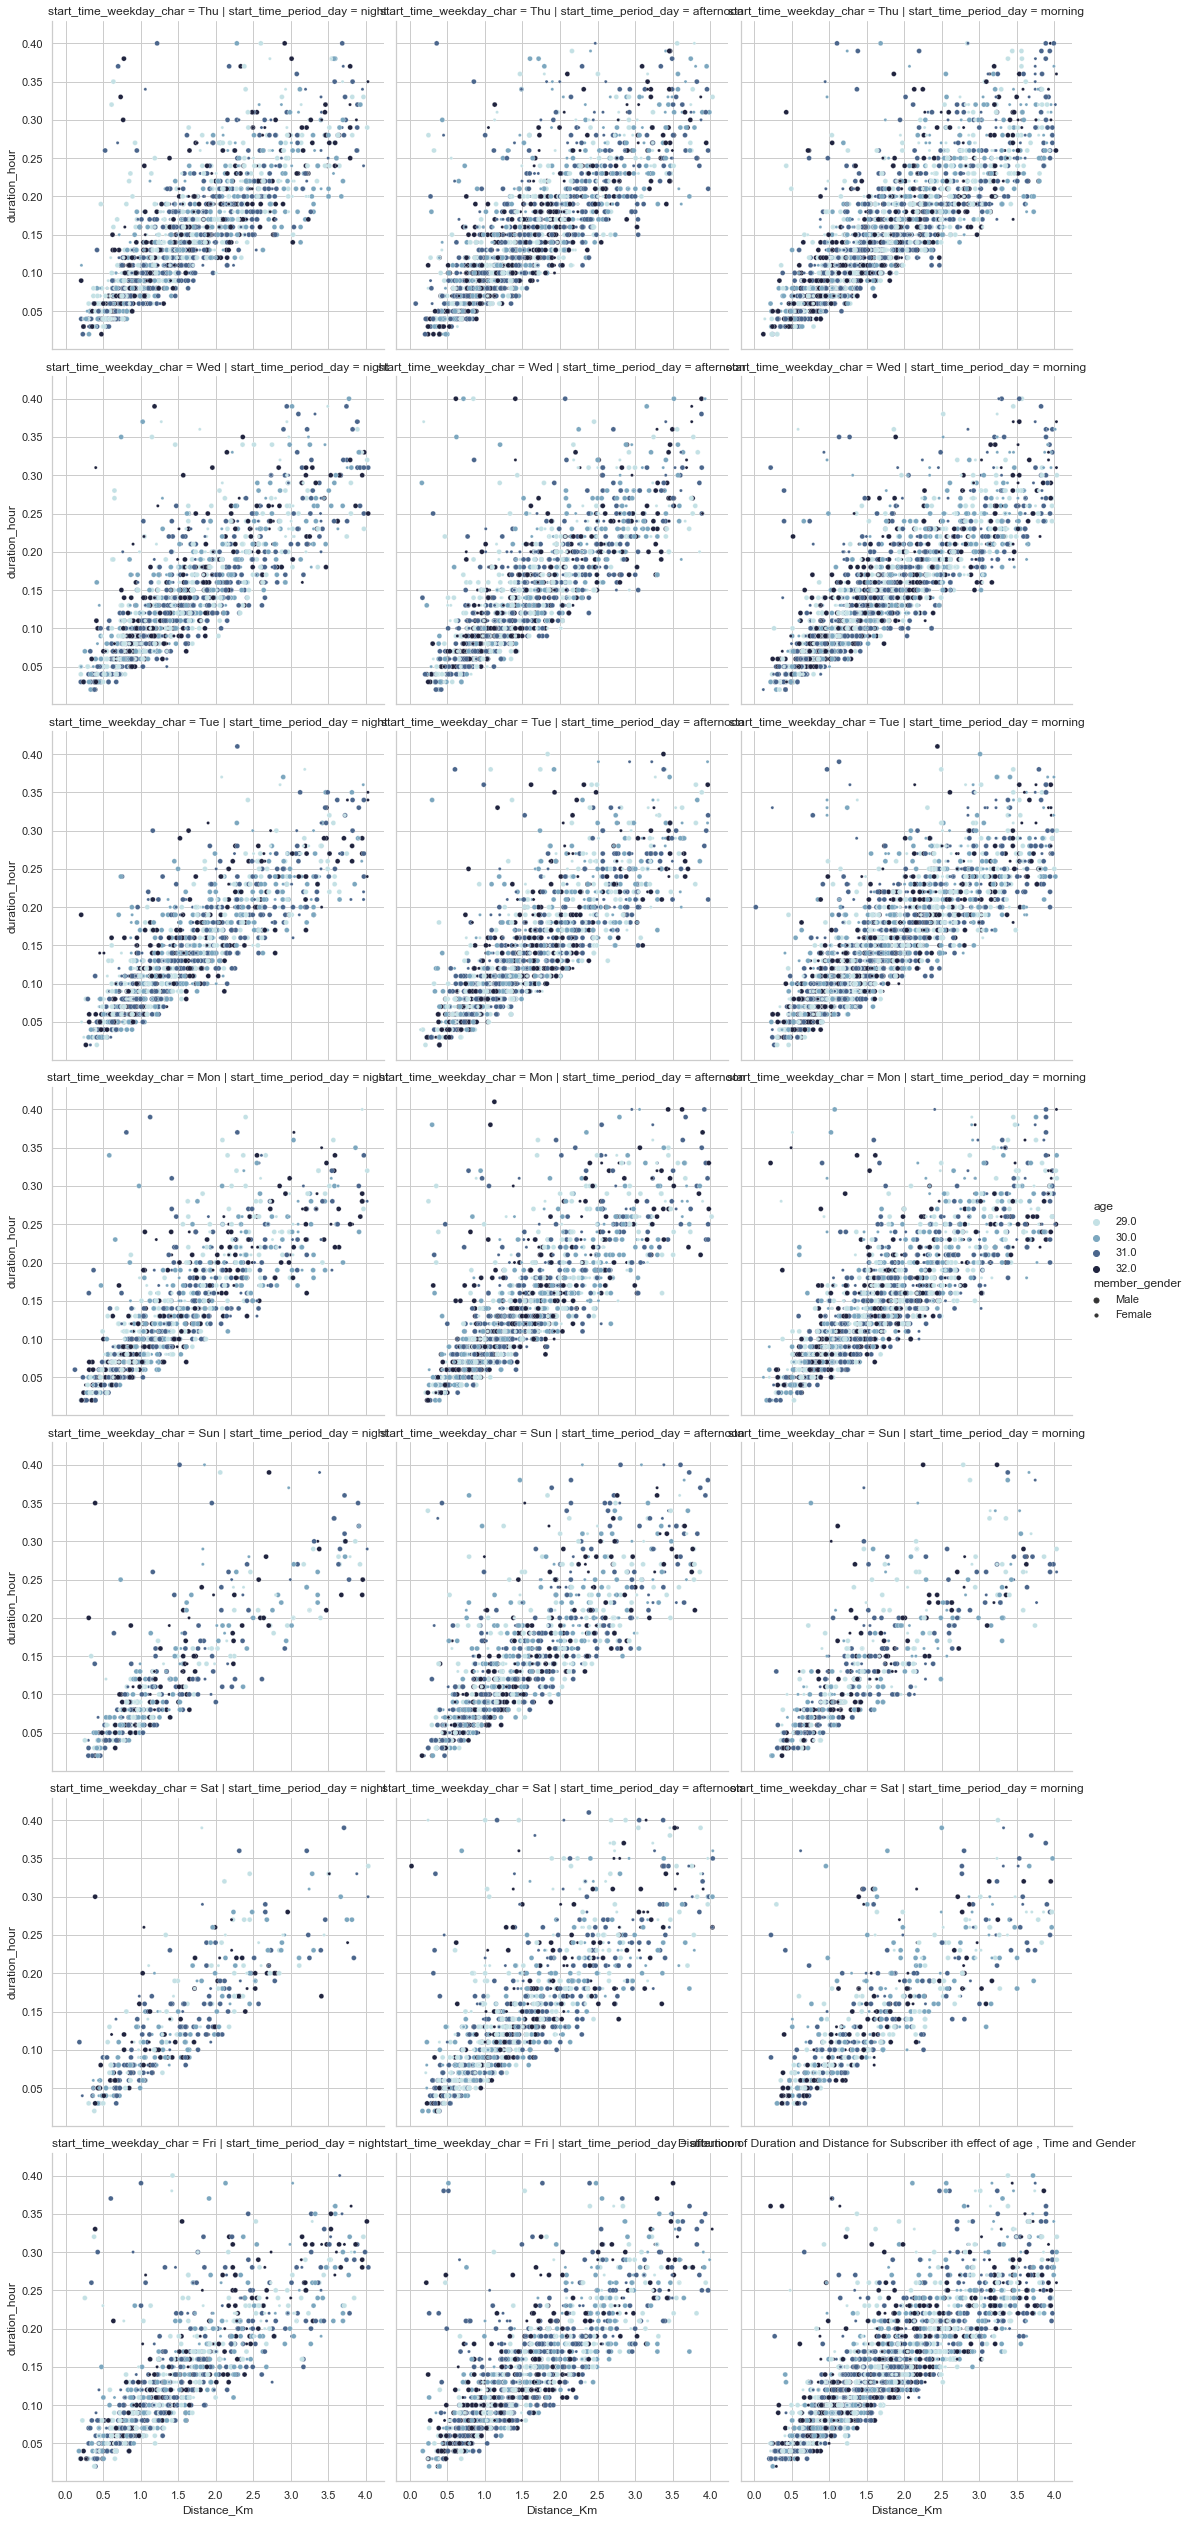

In [253]:
# now we will see if age between 28 and 32 as this age has the most number of data, 
#has any effect about how much distance can a rider do in such duration
age = data.loc[(data['age'] >= 29) & (data['age'] <=32)]
subscriber = age.loc[age['user_type'] == 'Subscriber']


plt.figure(figsize=[50, 25])

sns.set_theme(style="whitegrid")

# Load the example planets dataset

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
         data=subscriber,
         x="Distance_Km", y="duration_hour",
         hue="age", size = 'member_gender', col = 'start_time_period_day', row = 'start_time_weekday_char'
          ,palette=cmap, sizes=(10, 25))
plt.title('Distibution of Duration and Distance for Subscriber ith effect of age , Time and Gender');
plt.savefig('D.png')

- the age of member has no effect for duration or distance we can see that the distribution of age exit in every spot in our  graphs 
- the gender has absolutly an effect for duration and distance we can see that Male exist in some spot in graphs that is not   exist  
- days as sunday and saturday has less trips than other weekdays but it preserves the impact of the age and gender 
- period day as night has less trips than other period days 

<Figure size 8000x4000 with 0 Axes>

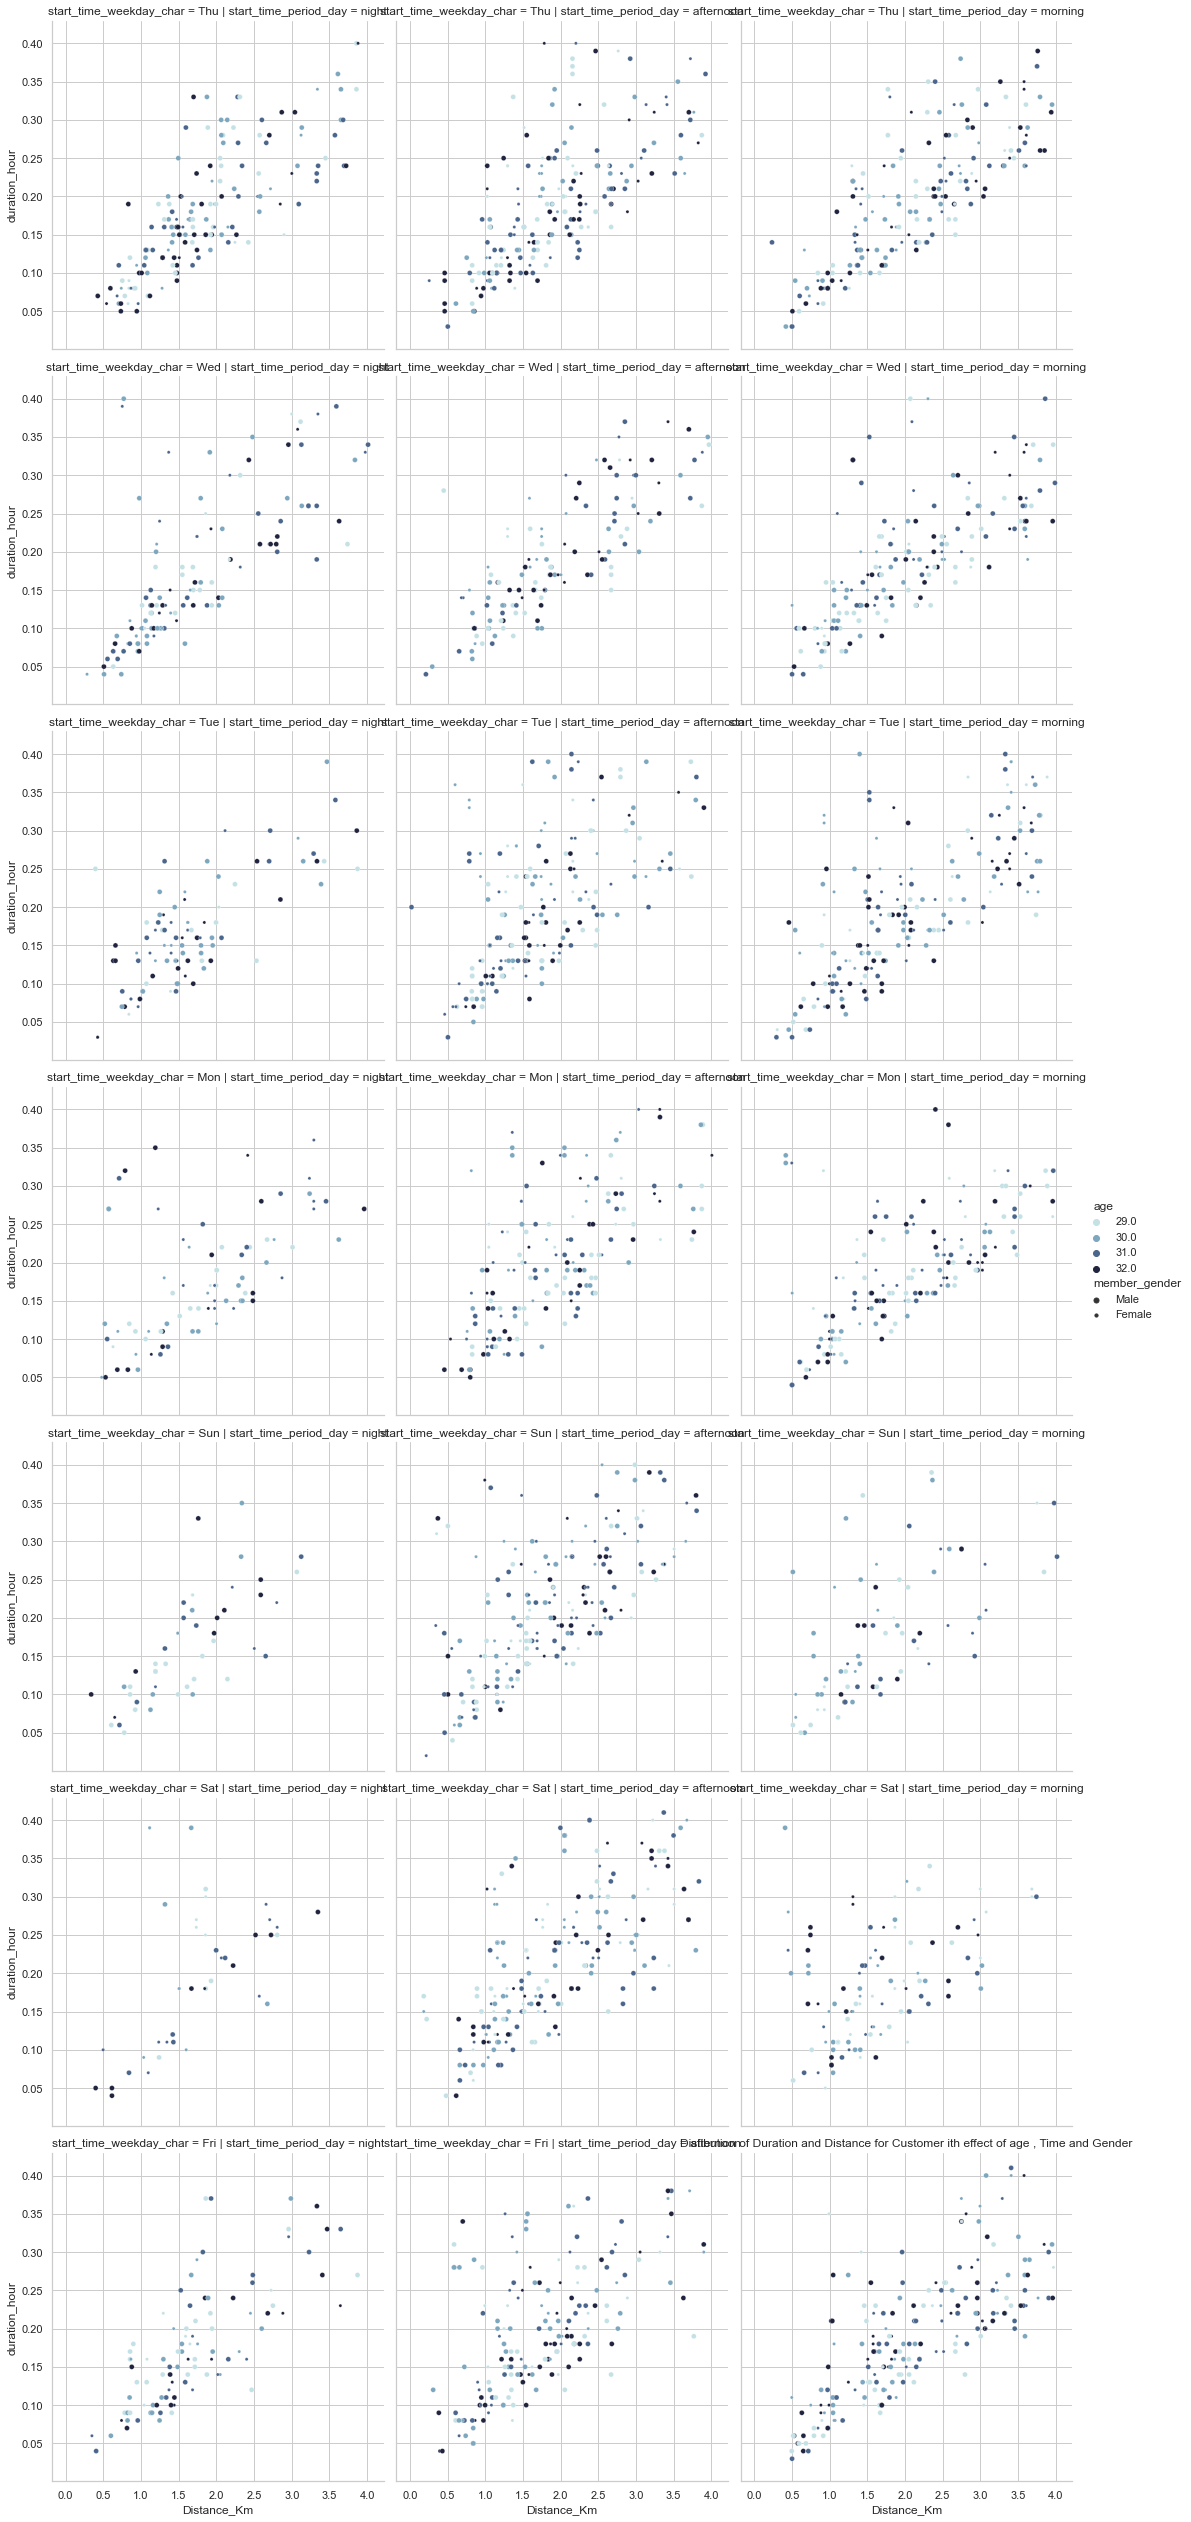

In [254]:
plt.figure(figsize=(100, 50), dpi=80)

sns.set_theme(style="whitegrid")
Customer = age.loc[age['user_type'] == 'Customer']

# Load the example planets dataset

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
         data=Customer,
         x="Distance_Km", y="duration_hour",
         hue="age", size = 'member_gender', col = 'start_time_period_day', row = 'start_time_weekday_char'
          ,palette=cmap, sizes=(10, 25))
plt.title('Distibution of Duration and Distance for Customer ith effect of age , Time and Gender');

plt.savefig('V.png')

- the age of member has no effect for duration or distance we can see that the distribution of age exit in every spot in our graphs

- the gender has absolutly an effect for duration and distance we can see that Male exist in some spot in graphs that is not exist

- days as sunday and saturday has less trips than other weekdays but it preserves the impact of the age and gender

- period day as night has less trips than other period days


# Conclusion
- After Analysing data we will say that Age has no effect of Distance and duration of tips between station 
- Gender has an  absolute effect on duration and distance Male tends to be use more speed than Female
- Subscriber use more speed than Customer 
- weekdays as sunday and saturday has less trips cause sunday and saturday is a weekend so may be there is no job to go for 
- members do more trips in morning and afternoon than nights

In [ ]:
!jupyter nbconvert Slides.ipynb --to slides --post serve --no-input --no-prompt


In [ ]:
This should open a tab in your web browser where you can scroll through your presentation. 
Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide 
notes like this one before you finish your presentation